<a href="https://colab.research.google.com/github/dorrabennour/Deep-learning-experimentations/blob/main/TP2_RN_DEEP_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install np_utils

In [ ]:
import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:

from keras.models import Sequential
model = Sequential()

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib as mpl
#mpl.use('TKAgg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.neighbors import NearestNeighbors

# Exercice1: Régression Logistique avec Keras

In [ ]:
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [ ]:
from keras.layers import Dense, Activation
model.add(Dense(10,  input_dim=784, name='fc1'))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


C'est un modèle de régression logistique à 7850 paramètres

In [ ]:
from keras.optimizers import SGD
learning_rate = 0.1
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
batch_size = 100
nb_epoch = 20
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 0.7964 - accuracy: 0.7940
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 0.3713 - accuracy: 0.8974
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 0.3401 - accuracy: 0.9048
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 0.3185 - accuracy: 0.9122
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 0.3100 - accuracy: 0.9133
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.9146
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 0.2966 - accuracy: 0.9190
Epoch 8/20
600/600 [==============================] - 1s 1ms/step - loss: 0.2902 - accuracy: 0.9194
Epoch 9/20
600/600 [==============================] - 1s 1ms/step - loss: 0.2889 - accuracy: 0.9198
Epoch 10/20
600/600 [==============================] - 1s 1ms/step - loss: 0.2818 - accuracy: 0.9209

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 27.14%
accuracy: 92.28%


# Exercice2:  Perceptron avec Keras

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
model.add(Dense(100,  input_dim=784, name='fc1'))
model.add(Activation('sigmoid'))
model.add(Dense(10,  input_dim=100, name='fc2'))

model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Nombre de paramètres =784*100+100 +100*10+10= 79510

In [ ]:
learning_rate=0.1

In [ ]:
from keras.optimizers import SGD
#learning_rate = 0.1
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
batch_size = 100
nb_epoch = 100
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 1.3285 - accuracy: 0.6825
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8855
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.9000
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.9106
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.9135
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.9176
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2614 - accuracy: 0.9245
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.9288
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2370 - accuracy: 0.9318
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2261 - accura

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 7.72%
accuracy: 97.70%


In [ ]:
from keras.models import model_from_yaml
def saveModel(model, savename):
  # serialize model to YAML
  model_yaml = model.to_yaml()
  with open(savename+".yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    print("Yaml Model ",savename,".yaml saved to disk")
  # serialize weights to HDF5
  model.save_weights(savename+".h5")
  print("Weights ",savename,".h5 saved to disk")

In [ ]:
saveModel(model, "EXO2")

Yaml Model  EXO2 .yaml saved to disk
Weights  EXO2 .h5 saved to disk


# Exercice 3 Réseaux de neurones convolutifs avec Keras

In [ ]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
model = Sequential()

In [ ]:
conv1 = Conv2D(16,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')
pool1 = MaxPooling2D(pool_size=(2, 2))
conv2 = Conv2D(32,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')
model.add(conv1)
model.add(pool1)
model.add(conv2
         )
model.add(Flatten())
model.add(Dense(100,  input_dim=784, name='fc1'))
model.add(Activation('sigmoid'))
model.add(Dense(10,  input_dim=100, name='fc2'))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 100)               204900    
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 10)               

In [ ]:
from keras.optimizers import SGD
learning_rate = 0.1
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
batch_size = 100
nb_epoch = 20
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model.fit(x_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/20
600/600 [==============================] - 29s 47ms/step - loss: 0.8948 - accuracy: 0.7244
Epoch 2/20
600/600 [==============================] - 28s 47ms/step - loss: 0.1646 - accuracy: 0.9540
Epoch 3/20
600/600 [==============================] - 28s 47ms/step - loss: 0.1015 - accuracy: 0.9715
Epoch 4/20
600/600 [==============================] - 28s 47ms/step - loss: 0.0770 - accuracy: 0.9779
Epoch 5/20
600/600 [==============================] - 28s 47ms/step - loss: 0.0629 - accuracy: 0.9824
Epoch 6/20
600/600 [==============================] - 28s 46ms/step - loss: 0.0490 - accuracy: 0.9869
Epoch 7/20
600/600 [==============================] - 28s 46ms/step - loss: 0.0460 - accuracy: 0.9868
Epoch 8/20
600/600 [==============================] - 28s 46ms/step - loss: 0.0383 - accuracy: 0.9902
Epoch 9/20
600/600 [==============================] - 28s 47ms/step - loss: 0.0334 - accuracy: 0.9915
Epoch 10/20
600/600 [==============================] - 28s 46ms/step - loss: 0.028

In [ ]:
scores = model.evaluate(x_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 3.16%
accuracy: 99.02%


# Exercice 4 : Visualisation avec t-SNE

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca',perplexity=30,verbose=2)
X_tsne = tsne.fit_transform(X_train[:10000])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.220s...
[t-SNE] Computed neighbors for 10000 samples in 155.754s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.039356
[t-SNE] Computed conditional probabilities in 0.606s
[t-SNE] Iteration 50: error = 84.4358673, gradient norm = 0.0045840 (50 iterations in 4.866s)
[t-SNE] 

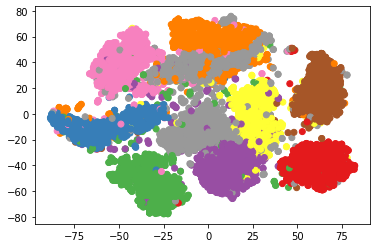

In [ ]:
fig, ax = plt.subplots()
im=ax.scatter(X_tsne[:,0],X_tsne[:,1],c=plt.cm.Set1(y_train[:10000]))


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train[:10000])
X_pca = pca.transform(X_train[:10000])

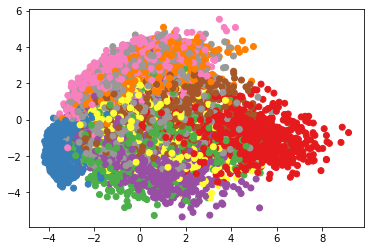

In [ ]:
fig, ax = plt.subplots()
im=ax.scatter(X_pca[:,0],X_pca[:,1],c=plt.cm.Set1(y_train[:10000]))

## Métrique de séparation des classes

In [ ]:
def convexHulls(points, labels):
    
  # computing convex hulls for a set of points with asscoiated labels
      convex_hulls = []
      for i in range(10):
        convex_hulls.append(ConvexHull(points[labels==i,:]))
      return convex_hulls
# Function Call
convex_hulls= convexHulls(X_tsne, y_train[:10000])
convex_hulls_pca= convexHulls(X_pca, y_train[:10000])

In [ ]:
convex_hulls

In [ ]:
def best_ellipses(points, labels):
  # computing best fiiting ellipse for a set of points with asscoiated labels
      gaussians = []
      for i in range(10):
        gaussians.append(GaussianMixture(n_components=1, covariance_type='full').fit(points[labels==i, :]))
      return gaussians
# Function Call
ellipses = best_ellipses(X_tsne, y_train[:10000])
ellipses = best_ellipses(X_pca, y_train[:10000])

In [ ]:
def neighboring_hit(points, labels):
  k = 6
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
  distances, indices = nbrs.kneighbors(points)

  txs = 0.0
  txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

  for i in range(len(points)):
    tx = 0.0
    for j in range(1,k+1):
      if (labels[indices[i,j]]== labels[i]):
        tx += 1
    tx /= k
    txsc[labels[i]] += tx
    nppts[labels[i]] += 1
    txs += tx

  for i in range(10):
    txsc[i] /= nppts[i]
  return txs / len(points)

In [ ]:
def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):

  points2D_c= []
  for i in range(10):
    points2D_c.append(points2D[labels==i, :])
  # Data Visualization
  cmap =cm.tab10

  plt.figure(figsize=(3.841, 7.195), dpi=100)
  plt.set_cmap(cmap)
  plt.subplots_adjust(hspace=0.4 )
  plt.subplot(311)
  plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
  plt.colorbar(ticks=range(10))

  plt.title("2D "+projname+" - NH="+str(nh*100.0))

  vals = [ i/10.0 for i in range(10)]
  sp2 = plt.subplot(312)
  for i in range(10):
      ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
      sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))
  plt.colorbar(ticks=range(10))
  plt.title(projname+" Convex Hulls")

  def plot_results(X, Y_, means, covariances, index, title, color):
      splot = plt.subplot(3, 1, 3)
      for i, (mean, covar) in enumerate(zip(means, covariances)):
          v, w = linalg.eigh(covar)
          v = 2. * np.sqrt(2.) * np.sqrt(v)
          u = w[0] / linalg.norm(w[0])
          # as the DP will not use every component it has access to
          # unless it needs it, we shouldn't plot the redundant
          # components.
          if not np.any(Y_ == i):
              continue
          plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

          # Plot an ellipse to show the Gaussian component
          angle = np.arctan(u[1] / u[0])
          angle = 180. * angle / np.pi  # convert to degrees
          ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
          ell.set_clip_box(splot.bbox)
          ell.set_alpha(0.6)
          splot.add_artist(ell)

      plt.title(title)
  plt.subplot(313)

  for i in range(10):
      plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_,
      ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

  plt.savefig(projname+".png", dpi=100)
  plt.show()

In [ ]:
X_train.shape

(60000, 784)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

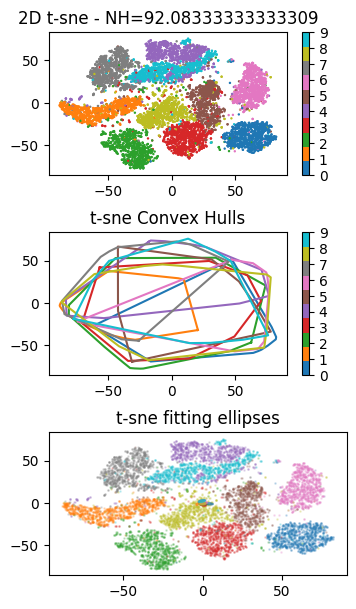

In [ ]:
nh=neighboring_hit(X_train[:10000], y_train[:10000])

visualization(X_tsne, y_train[:10000], convex_hulls, ellipses ,'t-sne', nh)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

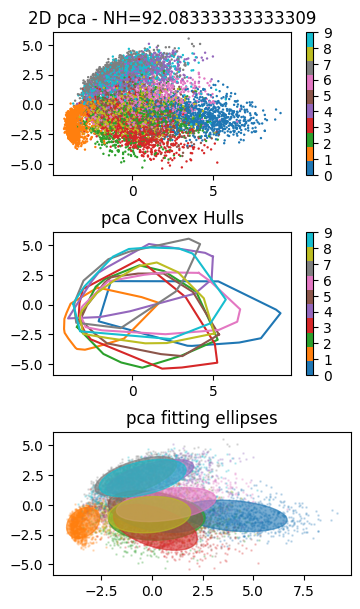

In [ ]:
visualization(X_pca, y_train[:10000], convex_hulls_pca, ellipses ,'pca', nh)

In [ ]:
#  plot_results(X, Y_, means, covariances, index, title, color)

# Exercice 5 : Visualisation des représentations internes des réseaux de neurones

In [ ]:
from keras.models import model_from_yaml
def loadModel(savename):
  with open(savename+".yaml", "r") as yaml_file:
    model = model_from_yaml(yaml_file.read())
  print ("Yaml Model ",savename,".yaml loaded ")
  model.load_weights(savename+".h5")
  print ("Weights ",savename,".h5 loaded ")
  return model

In [ ]:
#pip install hdf5=1.8.15

In [ ]:

mod2=loadModel("EXO2")

Yaml Model  EXO2 .yaml loaded 
Weights  EXO2 .h5 loaded 


In [ ]:
mod2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod2.pop()

In [ ]:
pred=mod2.predict(X_test) 

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca',perplexity=30,verbose=2)
X_tsne = tsne.fit_transform(pred[:10000])



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 1.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030143
[t-SNE] Computed conditional probabilities in 0.609s
[t-SNE] Iteration 50: error = 71.3609314, gradient norm = 0.0061631 (50 iterations in 4.128s)
[t-SNE] It

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(pred[:10000])
X_pca = pca.transform(pred[:10000])

In [ ]:
convex_hulls= convexHulls(X_tsne, y_test[:10000])
convex_hulls_pca= convexHulls(X_pca, y_test[:10000])

In [ ]:
ellipses_tsne = best_ellipses(X_tsne, y_test[:10000])
ellipses_pca = best_ellipses(X_pca, y_test[:10000])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

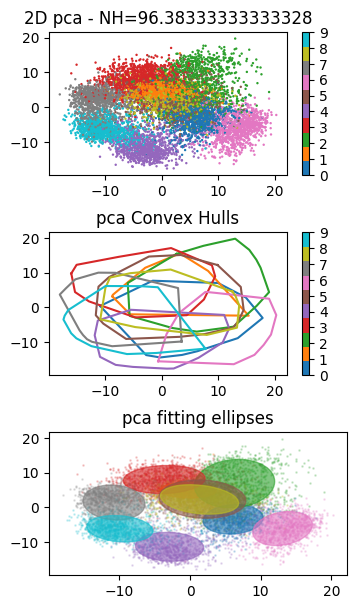

In [ ]:
visualization(X_pca, y_test[:10000], convex_hulls_pca, ellipses_pca ,'pca', nh)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

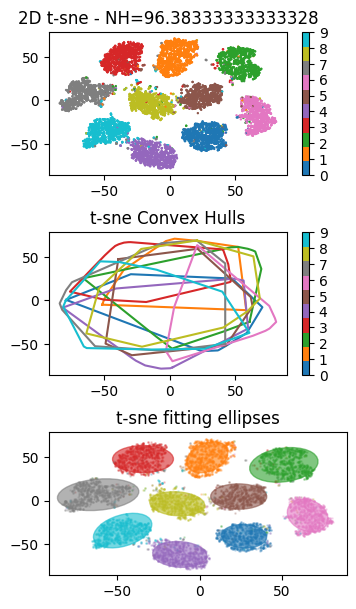

In [ ]:
nh=neighboring_hit(pred[:10000], y_test[:10000])

visualization(X_tsne, y_test[:10000], convex_hulls, ellipses_tsne,'t-sne', nh)
